In [79]:
import osmnx as ox
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
print("loaded")
colors = ['Red', 'Blue', 'Green', 'Yellow', 'Orange', 'Purple', 'Pink', 'Brown', 'Gray', 'Black', 'White', 'Cyan', 'Magenta']

loaded


In [82]:
def get_graph(name):
    G = ox.graph_from_place(place_name, network_type='all')
    G = ox.project_graph(G)
    return G

place_name = "Outremont, Montreal, Canada"
graph = get_graph(place_name)

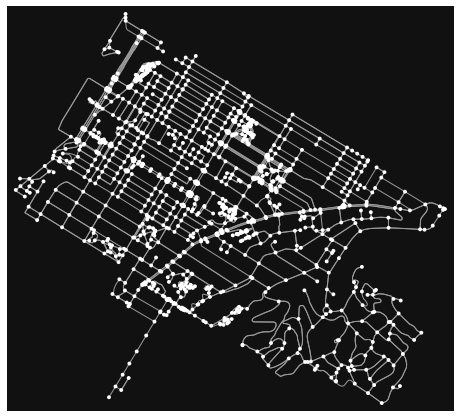

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [81]:
ox.plot_graph(graph_projected)

In [123]:
def get_color(node, comp):
    for count, components in enumerate(comp):
        if node in components:
            return colors[count]
    return None
        
def color_graph(G):
    # Tarjan algorithm
    strong_components = nx.strongly_connected_components(G)

    # Print the strongly connected components
    print("Strongly Connected Components:")
    comp = []
    for component in strong_components:
        comp.append(component)
        #print(component)
    node_colors = []
    colored_nodes = []
    for node in G.nodes:
        color = get_color(node, comp)
        if color is None or color == 'Pink':
            node_colors = 'Black'
        else:
            colored_nodes.append(node)
            node_colors = color
    return node_colors, colored_nodes

Strongly Connected Components:


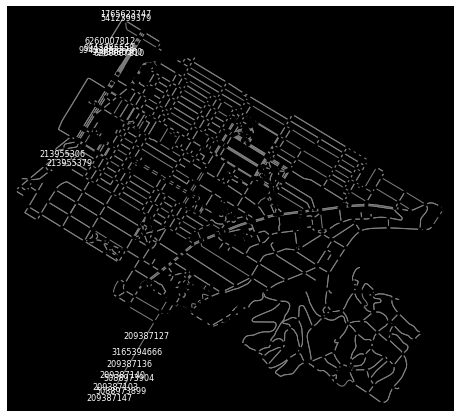

In [126]:
node_colors, colored_nodes = color_graph(graph)

fig, ax = ox.plot_graph(graph, node_color=node_colors, edge_color='grey', bgcolor='black', show=False, close=False)

for node in graph.nodes:
    if node in colored_nodes:
        x, y = graph.nodes[node]['x'], graph.nodes[node]['y']
        ax.text(x, y, node, fontsize=8, ha='center', va='center', color='white')

In [78]:
# determine if the graph is eularian which is super easy to have 
# a list of edges to visit
if nx.is_eulerian(graph):
    eulerian_cycle = list(nx.eulerian_circuit(graph))
    print("Eulerian cycle:")
    print(eulerian_cycle)
else:
    print("The graph does not have an Eulerian cycle.")

The graph does not have an Eulerian cycle.
